In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift,fft,ifft
plt.rcParams.update({'font.size': 16})
from copy import copy

In [2]:
%matplotlib notebook

# How many signals?

In [3]:
t=np.linspace(0,1,100)
i0=np.logspace(0,np.log10(len(t)),50,endpoint=False).astype(int)
i0[0]=0
# i0=np.unique(i0)
i=np.zeros(t.shape,dtype=bool)
i[i0]=True

<IPython.core.display.Javascript object>


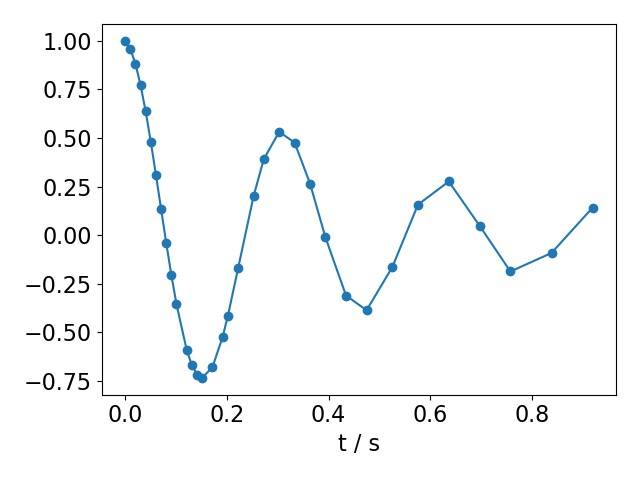

In [4]:
I=np.exp(1j*20*t)*np.exp(-2*t)
ax=plt.subplots()[1]
ax.scatter(t[i],I[i].real)
ax.plot(t[i],I[i].real)
ax.set_xlabel('t / s')
ax.figure.tight_layout()

<IPython.core.display.Javascript object>


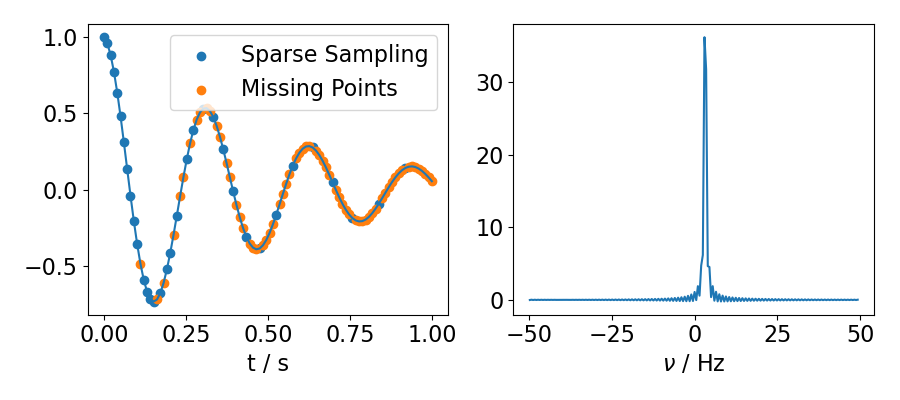

/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [10]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(t[i],I[i].real,label='Sparse Sampling')
ax[0].scatter(t[~i],I[~i].real,label='Missing Points')
ax[0].set_xlabel('t / s')
ax[0].plot(t,I)
ax[0].legend()

freq=1/(2*t[1])*np.linspace(-1,1,len(I)*2)
freq-=np.diff(freq[:2])/2
S=fftshift(fft(np.concatenate((I[:1]/2,I[1:])),len(I)*2))
ax[1].plot(freq,S.real)
ax[1].set_xlabel(r'$\nu$ / Hz')
fig.set_size_inches([9,4])
fig.tight_layout()

<IPython.core.display.Javascript object>


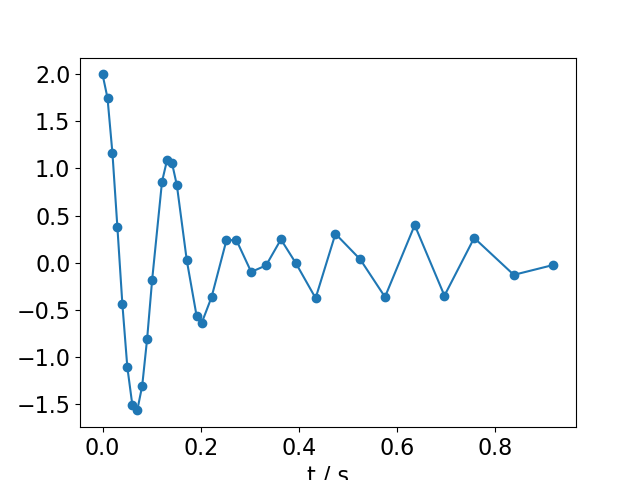

Text(0.5, 0, 't / s')

In [31]:
I=np.exp(1j*50*t)*np.exp(-2*t)+np.exp(1j*40*t)*np.exp(-3*t)
ax=plt.subplots()[1]
ax.scatter(t[i],I[i].real)
ax.plot(t[i],I[i].real)
ax.set_xlabel('t / s')

<IPython.core.display.Javascript object>


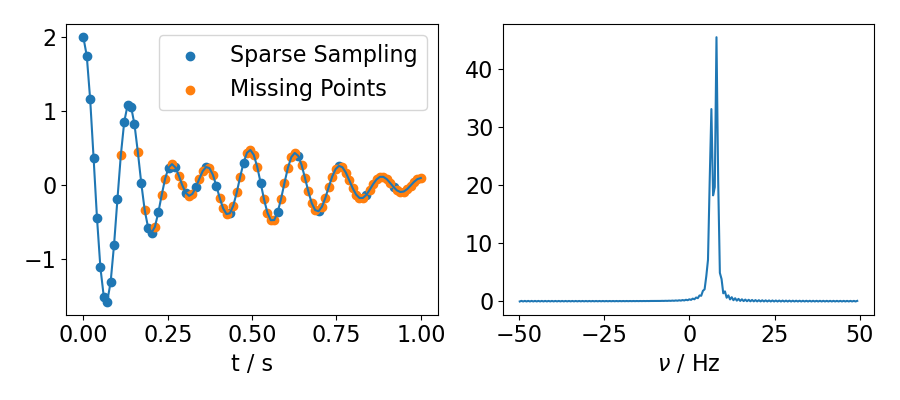

/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [13]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(t[i],I[i].real,label='Sparse Sampling')
ax[0].scatter(t[~i],I[~i].real,label='Missing Points')
ax[0].set_xlabel('t / s')
ax[0].plot(t,I)
ax[0].legend()

freq=1/(2*t[1])*np.linspace(-1,1,len(I)*2)
freq-=np.diff(freq[:2])/2
S=fftshift(fft(np.concatenate((I[:1]/2,I[1:])),len(I)*2))
ax[1].plot(freq,S.real)
ax[1].set_xlabel(r'$\nu$ / Hz')
fig.set_size_inches([9,4])
fig.tight_layout()

<IPython.core.display.Javascript object>


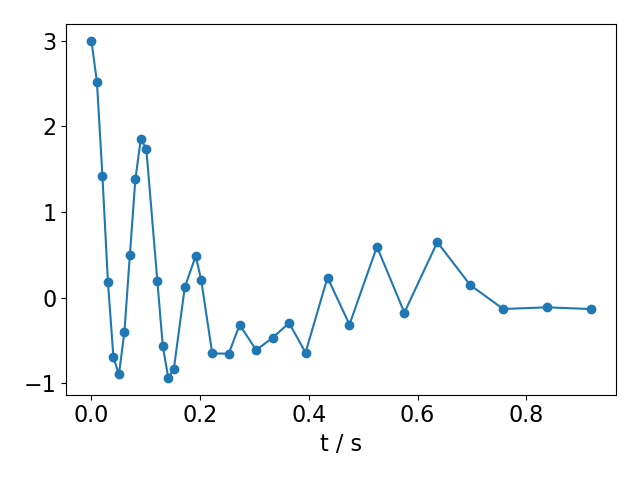

In [14]:
I=np.exp(1j*70*t)*np.exp(-2*t)+np.exp(1j*60*t)*np.exp(-3*t)+np.exp(1j*-10*t)*np.exp(-2*t)
ax=plt.subplots()[1]
ax.scatter(t[i],I[i].real)
ax.plot(t[i],I[i].real)
ax.set_xlabel('t / s')
ax.figure.tight_layout()

<IPython.core.display.Javascript object>


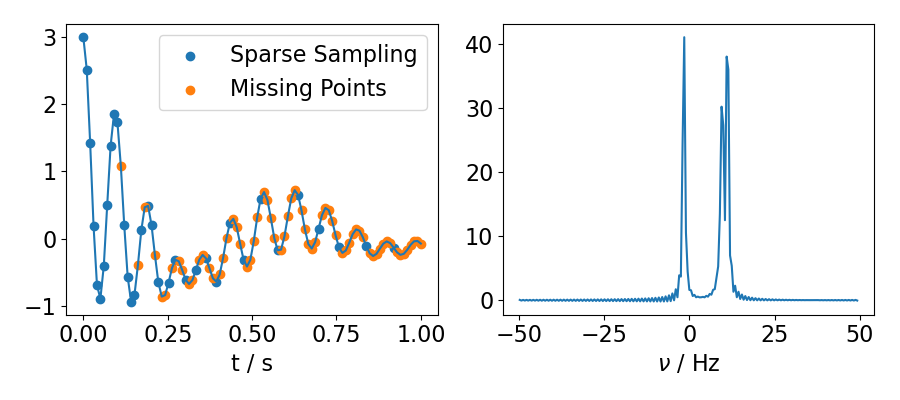

/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [15]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(t[i],I[i].real,label='Sparse Sampling')
ax[0].scatter(t[~i],I[~i].real,label='Missing Points')
ax[0].set_xlabel('t / s')
ax[0].plot(t,I)
ax[0].legend()

freq=1/(2*t[1])*np.linspace(-1,1,len(I)*2)
freq-=np.diff(freq[:2])/2
S=fftshift(fft(np.concatenate((I[:1]/2,I[1:])),len(I)*2))
ax[1].plot(freq,S.real)
ax[1].set_xlabel(r'$\nu$ / Hz')
fig.set_size_inches([9,4])
fig.tight_layout()

<IPython.core.display.Javascript object>


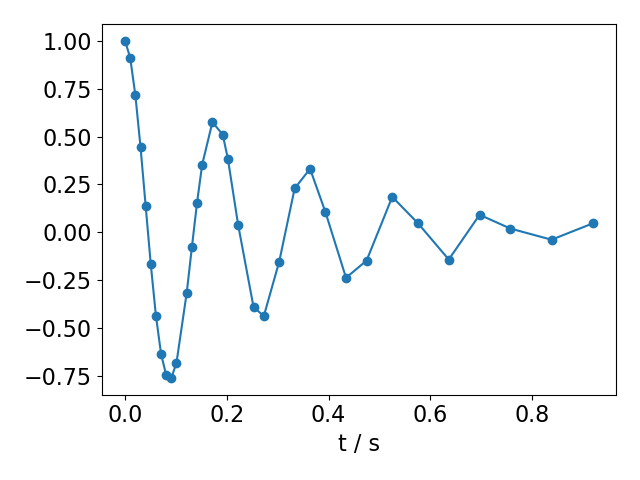

In [18]:
I=np.exp(-1j*35*t)*np.exp(-3*t)

# I[~i]=2*np.random.rand((~i).sum())-1+1j*(2*np.random.rand((~i).sum())-1)
I[~i]+=(np.exp(1j*130*t[~i])+np.exp(1j*-50*t[~i]))*np.exp(-2*t[~i])

ax=plt.subplots()[1]
ax.scatter(t[i],I[i].real)
ax.plot(t[i],I[i].real)
ax.set_xlabel('t / s')
ax.figure.tight_layout()

In [ ]:
leg.

<IPython.core.display.Javascript object>


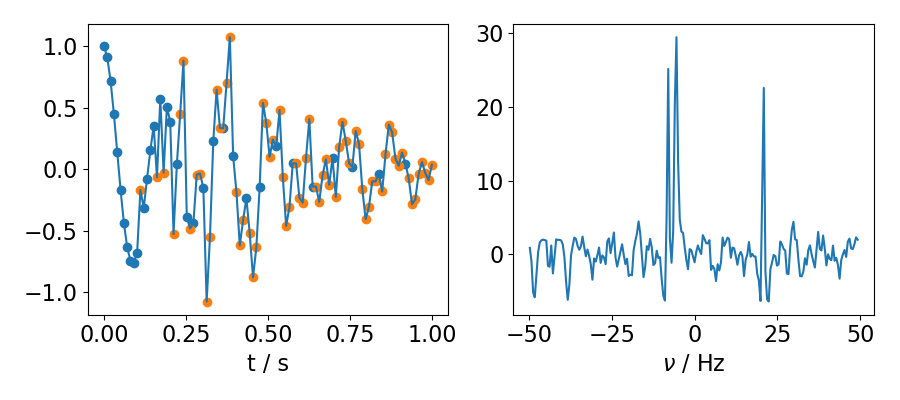

/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [27]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(t[i],I[i].real,label='Sparse Sampling')
ax[0].scatter(t[~i],I[~i].real,label='Missing Points')
ax[0].set_xlabel('t / s')
ax[0].plot(t,I)

freq=1/(2*t[1])*np.linspace(-1,1,len(I)*2)
freq-=np.diff(freq[:2])/2
S=fftshift(fft(np.concatenate((I[:1]/2,I[1:])),len(I)*2))
ax[1].plot(freq,S.real)
ax[1].set_xlabel(r'$\nu$ / Hz')
fig.set_size_inches([9,4])
fig.tight_layout()

# Sparse Sampling Algorithms

## Harvard

In [198]:
SW=200
TD=300
SI=2048
SF=150
O=100


SWH=SF*SW
dt=1/SWH

In [199]:
A,delta1,lw1,delta2,lw2=[[] for _ in range(5)]
with open('peaks.txt','r') as f:
    for line in f:
        i,d1,l1,d2,l2=[float(x) for x in line.strip().split('\t')]
        A.append(i)
        delta1.append(d1)
        lw1.append(l1)
        delta2.append(d2)
        lw2.append(l2)
A,delta1,lw1,delta2,lw2=[np.array(x) for x in [A,delta1,lw1,delta2,lw2]]
A[np.argmax(A)]/=5

i=np.logical_and(delta2>53,delta2<65)

A,delta1,lw1=[np.atleast_2d(x[i]).T for x in [A,delta1,lw1]]

In [200]:
t=np.arange(TD)*dt
I=(A*np.exp(np.pi*SF*(1j*2*(delta1-O)-lw1)*np.atleast_2d(t))).sum(0)
I+=np.random.randn(*I.shape)*np.exp(1j*2*np.pi*np.random.rand(*I.shape))*A.max()/10

I0=copy(I)
I0[0]/=2
apod=np.cos(np.arange(TD)/TD*np.pi/2)**2
I0*=apod

S=fftshift(fft(I0,SI))
f=1/(2*dt)*np.linspace(-1,1,SI)
f-=np.diff(f[:2])/2

In [201]:
i0=np.logspace(0,np.log10(TD),int(TD/1.7),endpoint=False).astype(int)
i0[0]=0
i=np.zeros(TD,dtype=bool)
i[i0]=True
print(i.sum()/len(i))

0.33666666666666667


In [216]:
def step(I,i,SI,threshold=.9):
    I0=copy(I)
    I0[0]/=2
    S=fft(I0,SI)
    pks=S.real/S.real.max()>threshold
    S1=np.zeros(S.shape,dtype=complex)
    S1[pks]=S[pks]-threshold
    Iout=copy(I)
    Iout[~i]=ifft(S1)[:len(I)][~i]   
    
    apod=np.cos(np.arange(TD)/TD*np.pi/2)**2
    Sout=fftshift(fft(apod*np.concatenate((Iout[:1]/2,Iout[1:])),SI))
    
    return Iout,Sout

In [217]:
Isparse=copy(I)
Isparse[~i]=0
Ssparse=fftshift(fft(np.concatenate((Isparse[:1]/2,Isparse[1:])),SI))
Iout,Sout=step(Isparse,i,SI,threshold=.9)

<IPython.core.display.Javascript object>


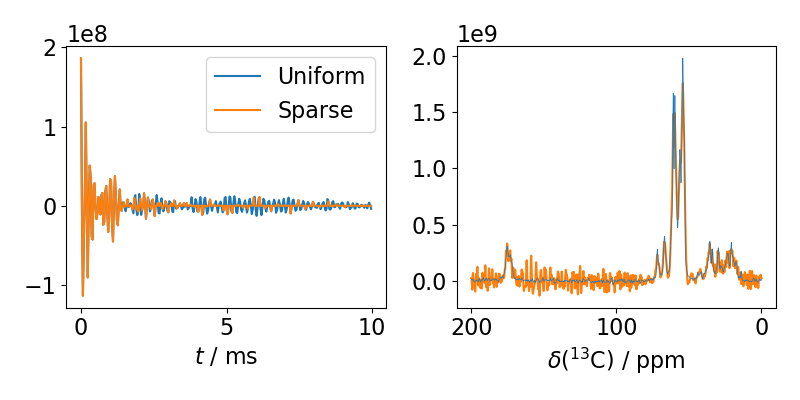

In [218]:
fig,ax=plt.subplots(1,2)
cmap=plt.get_cmap('tab10')
ax[0].plot(t*1e3,I.real,color=cmap(0),label='Uniform')
ax[0].plot(t*1e3,Isparse.real,color=cmap(1),label='Sparse')
ax[1].plot(f/SF+O,Ssparse.real,color=cmap(1),label='Sparse')
ax[1].plot(f/SF+O,S.real,color=cmap(0),label='Uniform',linewidth=.5)
ax[0].legend()
ax[1].invert_xaxis()
ax[0].set_xlabel(r'$t$ / ms')
ax[1].set_xlabel(r'$\delta(^{13}$C) / ppm')
fig.set_size_inches([8,4])
fig.tight_layout()

In [219]:
Iout=Isparse
out=[]
for thresh in np.linspace(1,.03,1000):
    Iout,Sout=step(Iout,i,SI,threshold=thresh)
    out.append((Iout,Sout))

<IPython.core.display.Javascript object>


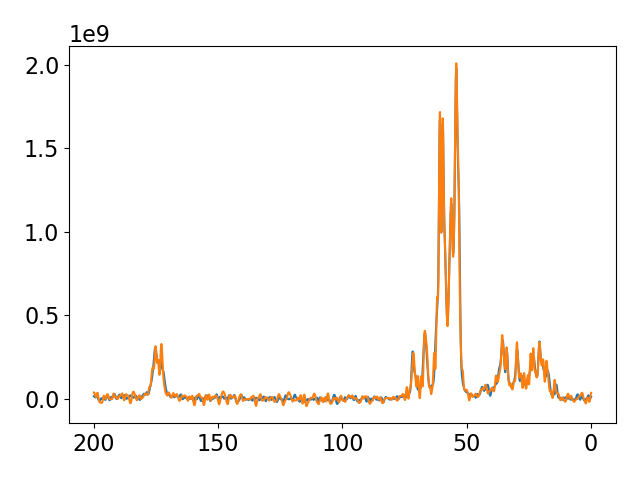

In [220]:
ax=plt.subplots()[1]
ax.plot(f/SF+O,S.real)
ax.plot(f/SF+O,Sout.real)
ax.figure.tight_layout()
ax.invert_xaxis()

<IPython.core.display.Javascript object>


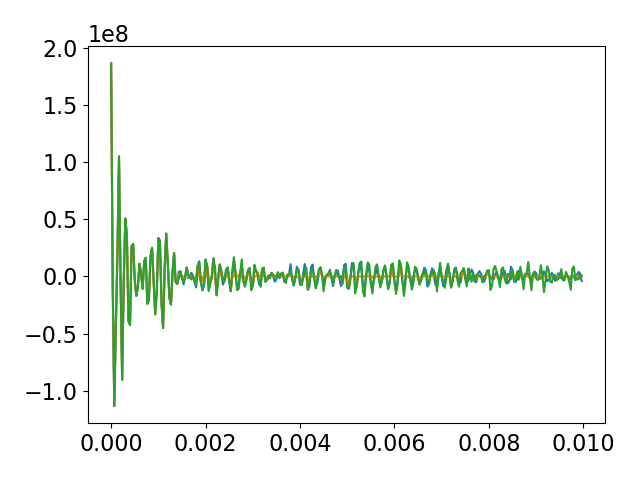

In [221]:
ax=plt.subplots()[1]
ax.plot(t,I.real)
ax.plot(t,Isparse.real)
ax.plot(t,Iout.real)
ax.figure.tight_layout()

<IPython.core.display.Javascript object>


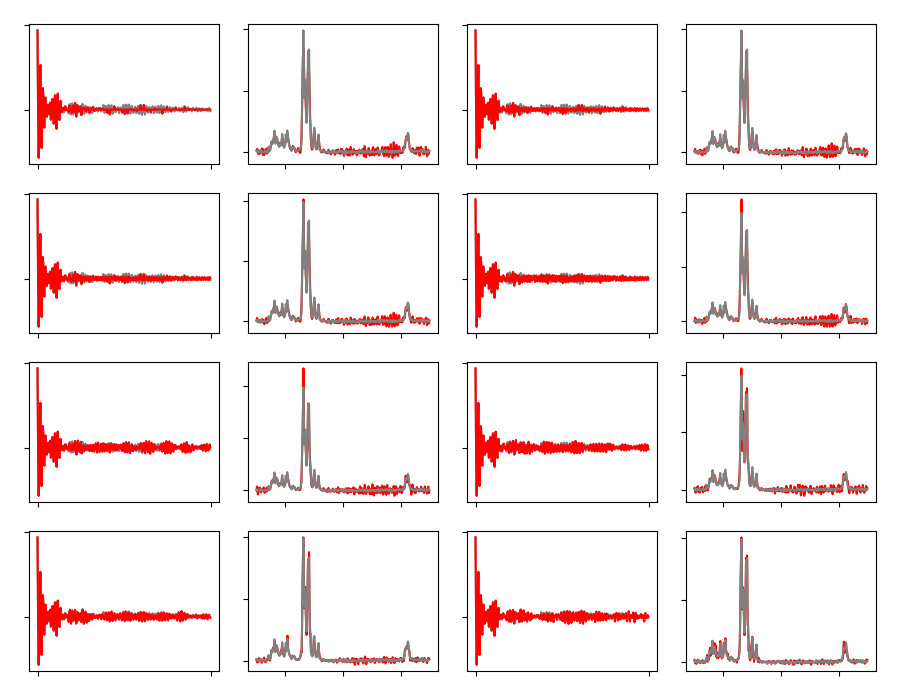

In [222]:
fig,ax=plt.subplots(4,4)
ax=ax.flatten()
for k,o in enumerate([*out[::150],out[-1]]):
    ax[2*k].plot(t,I.real,color='grey')
    ax[2*k].plot(t,o[0].real,color='red')
    
    ax[2*k+1].plot(f,o[1].real,color='red')
    ax[2*k+1].plot(f,S.real,color='grey')
    
for a in ax:a.set_yticklabels('')
for a in ax:a.set_xticklabels('')
fig.set_size_inches([9,7])
fig.tight_layout()

<IPython.core.display.Javascript object>


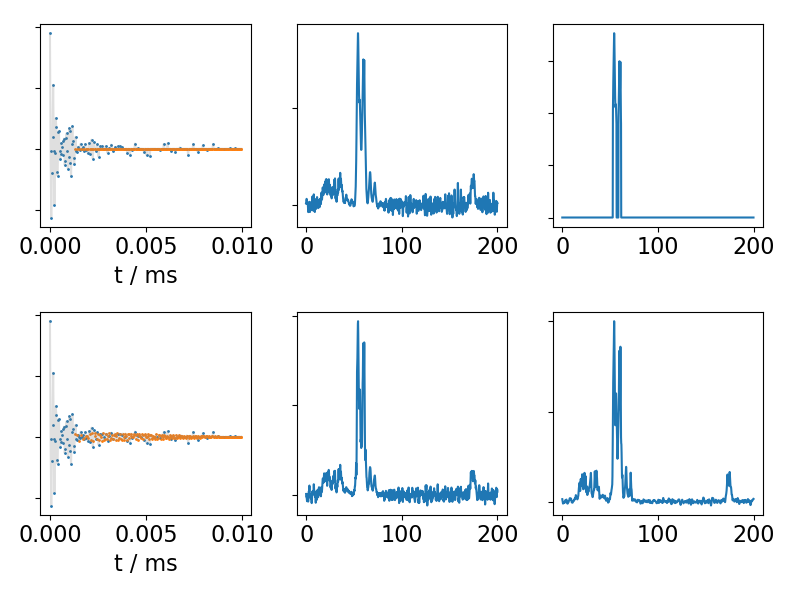

In [66]:
fig,ax=plt.subplots(2,3)
ax=ax.flatten()

ax[0].plot(t,Isparse.real,color='grey',alpha=.25)
ax[0].scatter(t[i],Isparse[i].real,1)
ax[0].scatter(t[~i],np.zeros((~i).sum()),1)



I0=copy(Isparse)
I0[0]/=2
S=fft(I0,SI)

ax[1].plot(f/SF+O,fftshift(S.real))

pks=S.real/S.real.max()>0.5
S1=np.zeros(S.shape,dtype=complex)
S1[pks]=S[pks]

ax[2].plot(f/SF+O,fftshift(S1.real))

ax[3].plot(t,Iout.real,color='grey',alpha=.25)
ax[3].scatter(t[i],Isparse[i].real,1)
ax[3].scatter(t[~i],Iout[~i].real,1)


Iout=copy(I)
Iout[~i]=ifft(S1)[:len(I)][~i]   

Sout=fft(np.concatenate((Iout[:1]/2,Iout[1:])),SI)

ax[4].plot(f/SF+O,fftshift(Sout.real))

ax[5].plot(f/SF+O,out[-1][1].real)

fig.set_size_inches(8,6)
for a in ax:a.set_yticklabels('')
    
for a in ax[[0,3]]:a.set_xlabel('t / ms')

fig.tight_layout()

In [486]:
ax[[0,3]]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

# SIFT

<IPython.core.display.Javascript object>


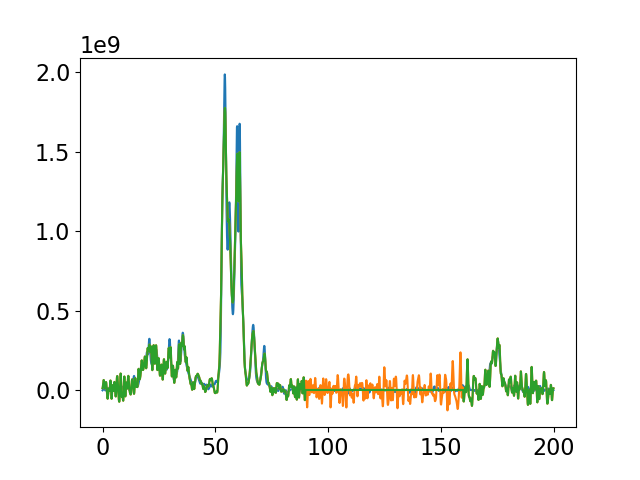

In [179]:
ax=plt.subplots()[1]
ax.plot(f/SF+O,S.real)
ax.plot(f/SF+O,Ssparse.real)

bright=[[7,80],[160,185]]
bright=[[np.argmin(np.abs(f/SF+O-b0)) for b0 in b] for b in bright]
zero_id=[np.argmin(np.abs(f/SF+O-90)),np.argmin(np.abs(f/SF+O-160))]

S1=copy(Ssparse)
S1[zero_id[0]:zero_id[1]]=0
ax.plot(f/SF+O,S1.real)

In [187]:
for b in bright:
    print(b)

[72, 819]
[1638, 1894]


In [188]:
def step(I,i,SI,bright):
    I0=copy(I)
    I0[0]/=2
    S0=fftshift(fft(I0,SI))
    S=np.zeros(S0.shape,dtype=complex)
    for b in bright:
        S[b[0]:b[1]]=S0[b[0]:b[1]]

    Iout=copy(I)
    Iout[~i]=ifft(fftshift(S))[:len(I)][~i]
    
    apod=np.cos(np.arange(len(I))/len(I)*np.pi/2)**2
    Sout=fftshift(fft(apod*np.concatenate((Iout[:1]/2,Iout[1:])),SI))
    
    return Iout,Sout

In [190]:
Iout=Isparse
out=[]
for _ in range(50):
    Iout,Sout=step(Iout,i,SI,bright)
    out.append((Iout,Sout))

<IPython.core.display.Javascript object>


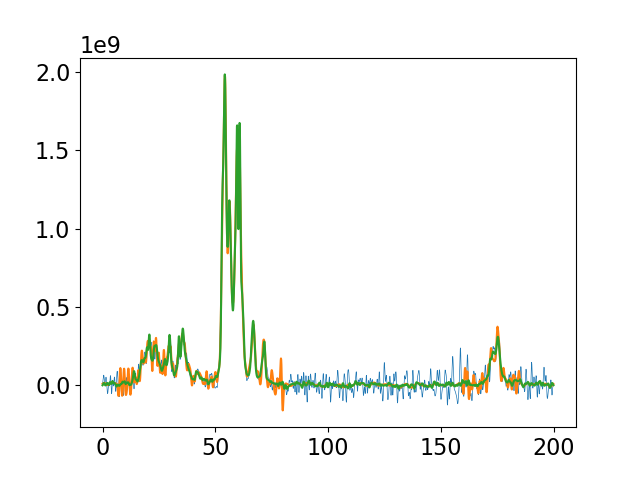

In [192]:
ax=plt.subplots()[1]
ax.plot(f/SF+O,Ssparse.real,linewidth=.5)
ax.plot(f/SF+O,Sout.real)
ax.plot(f/SF+O,S.real)
# ax.figure

# The Point Spread Function

In [195]:
PS=fftshift(fft(i,SI))

<IPython.core.display.Javascript object>


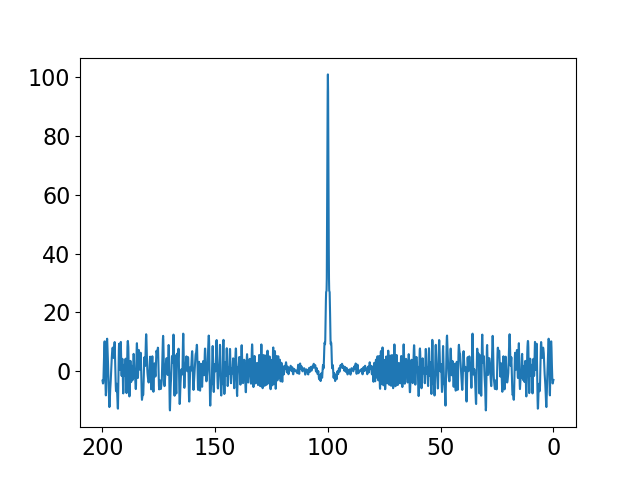

In [197]:
ax=plt.subplots()[1]
ax.plot(f/SF+O,PS.real)
ax.invert_xaxis()